# Tree-based methods

## Random Forest

In [12]:
library(randomForest)

data(iris)
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

### Ploting data

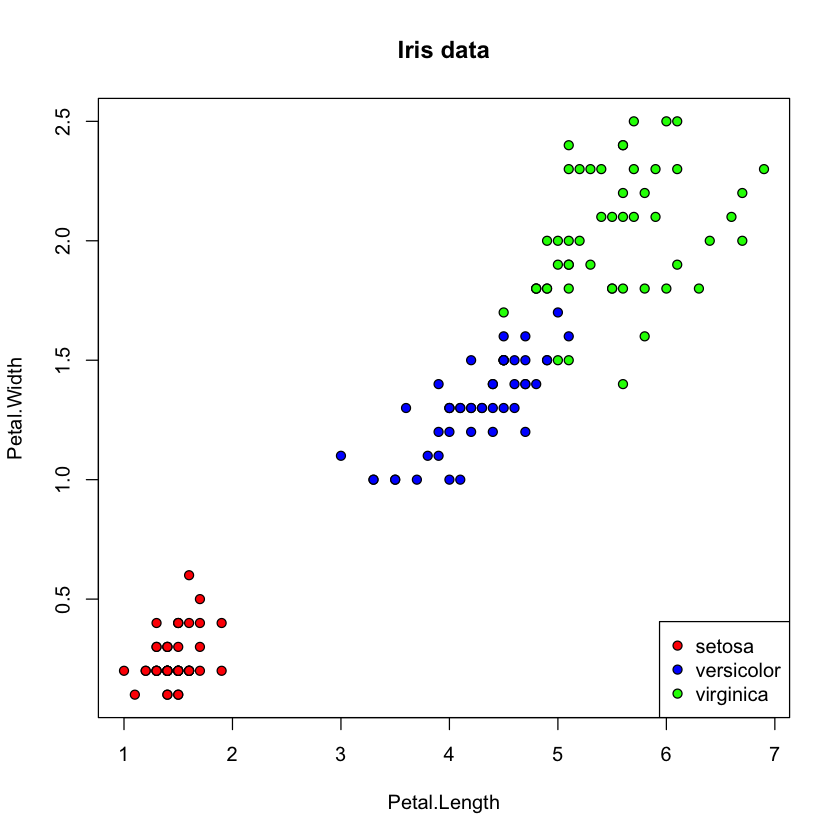

In [2]:
plot(iris[,3], iris[,4], pch=21, xlab=names(iris)[3], ylab=names(iris)[4],
     bg=c("red", "blue", "green")[as.numeric(factor(iris$Species))],
     main="Iris data")
legend("bottomright", pch=21,legend=levels(iris$Species),pt.bg=c("red", "blue", "green"))

### Training and testing

In [3]:
rowsTrain=sample(1:nrow(iris),round(0.75*nrow(iris)))
train = iris[rowsTrain,]
head(train)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
23  4.6          3.6         1.0          0.2         setosa    
135 6.1          2.6         5.6          1.4         virginica 
79  6.0          2.9         4.5          1.5         versicolor
67  5.6          3.0         4.5          1.5         versicolor
105 6.5          3.0         5.8          2.2         virginica 
130 7.2          3.0         5.8          1.6         virginica

### Prediction

In [7]:
iris.rf <- randomForest(train[,-5], train[,5])
iris.rf


Call:
 randomForest(x = train[, -5], y = train[, 5]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.36%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         42          0         0  0.00000000
versicolor      0         34         2  0.05555556
virginica       0          4        30  0.11764706

In [8]:
pred=predict(iris.rf,iris[-rowsTrain,])

table(pred,iris[-rowsTrain,5])


            
pred         setosa versicolor virginica
  setosa          8          0         0
  versicolor      0         13         0
  virginica       0          1        16

In [9]:
# And I can tune RF parameters 

fit=randomForest(Species~.,data = iris, subset = rowsTrain, mtry=2, ntree=200)

fit


Call:
 randomForest(formula = Species ~ ., data = iris, mtry = 2, ntree = 200,      subset = rowsTrain) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.36%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         42          0         0  0.00000000
versicolor      0         34         2  0.05555556
virginica       0          4        30  0.11764706

### Variable importance list

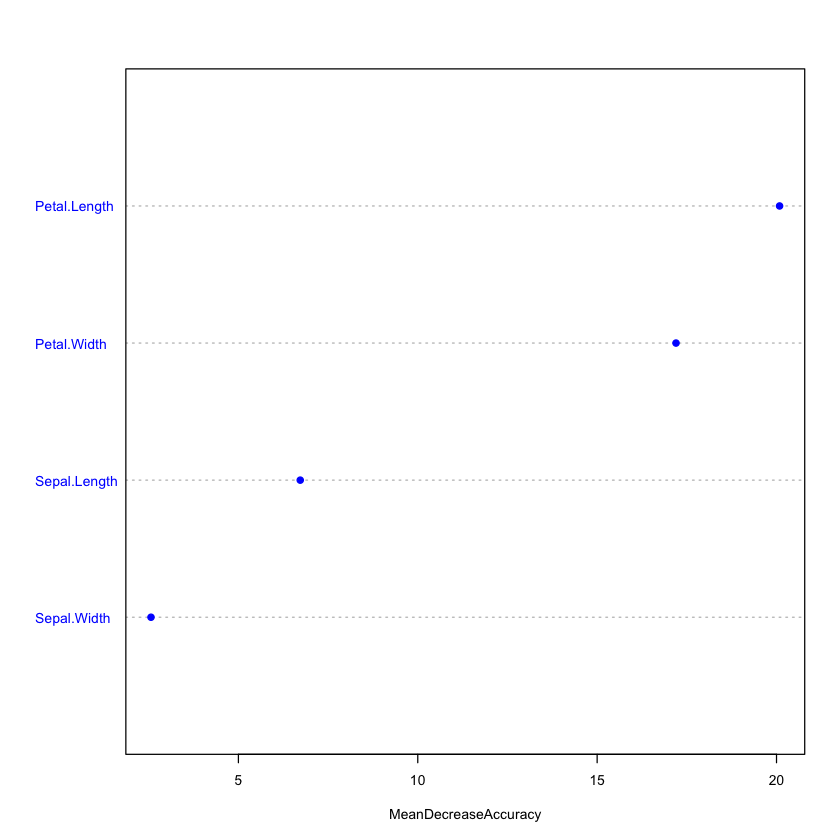

In [10]:
wVIL <- randomForest(Species ~ ., data = iris, subset = rowsTrain, mtry=2, ntree=200,importance=TRUE)
varImpPlot(wVIL, type=1, pch=19, col="blue", cex=0.7, main="")


In [11]:
?varImpPlot